## Trabajar con series de tiempo: definir formato, filtrar, cambiar fomato, restar fechas, resampling

In [1]:
import numpy as np
import pandas as pd

### Propiedades/metodos para trabajar con Series de tiempo

In [2]:
# 1. Series.dt.date: Returns numpy array of python datetime.date objects.

# 2. Series.dt.time: Returns numpy array of datetime.time objects.

# 3. Series.dt.timetz: Returns numpy array of datetime.time objects with timezones.

# 4. Series.dt.year: The year of the datetime.

# 5. Series.dt.month: The month as January=1, December=12.

# 6. Series.dt.day: The day of the datetime.

# 7. Series.dt.hour: The hours of the datetime.

# 8. Series.dt.minute: The minutes of the datetime.

# 9. Series.dt.second: The seconds of the datetime.

# 10. Series.dt.microsecond: The microseconds of the datetime.

# 11. Series.dt.nanosecond: The nanoseconds of the datetime.

# 12. Series.dt.week: (DEPRECATED) The week ordinal of the year according to the ISO 8601 standard.

# 13. Series.dt.weekofyear: (DEPRECATED) The week ordinal of the year according to the ISO 8601 standard.

# 14. Series.dt.dayofweek: The day of the week with Monday=0, Sunday=6.

# 15. Series.dt.day_of_week: The day of the week with Monday=0, Sunday=6.

# 16. Series.dt.weekday: The day of the week with Monday=0, Sunday=6.

# 17. Series.dt.dayofyear: The ordinal day of the year.

# 18. Series.dt.day_of_year: The ordinal day of the year.

# 19. Series.dt.quarter: The quarter of the date.

# 20. Series.dt.is_month_start: Indicates whether the date is the first day of the month.

# 21. Series.dt.is_month_end: Indicates whether the date is the last day of the month.

# 22. Series.dt.is_quarter_start: Indicator for whether the date is the first day of a quarter.

# 23. Series.dt.is_quarter_end: Indicator for whether the date is the last day of a quarter.

# 24. Series.dt.is_year_start: Indicate whether the date is the first day of a year.

# 25. Series.dt.is_year_end: Indicate whether the date is the last day of the year.

# 26. Series.dt.is_leap_year: Boolean indicator if the date belongs to a leap year.

# 27. Series.dt.daysinmonth: The number of days in the month.

# 28. Series.dt.days_in_month: The number of days in the month.

# 29. Series.dt.tz: Return the timezone.

# 30. Series.dt.freq: Return the frequency object for this PeriodArray.

# 31. Series.day_name(): Return the name of the day 

In [3]:
df = pd.read_csv('data/ETH_1h.txt')

In [4]:
df

,Date,Symbol,Open,High,Low,Close,Volume
0,2020-03-13 08-PM,ETHUSD,129.94,131.82,126.87,128.71,1940673.93
1,2020-03-13 07-PM,ETHUSD,119.51,132.02,117.10,129.94,7579741.09
2,2020-03-13 06-PM,ETHUSD,124.47,124.85,115.50,119.51,4898735.81
3,2020-03-13 05-PM,ETHUSD,124.08,127.42,121.63,124.47,2753450.92
4,2020-03-13 04-PM,ETHUSD,124.85,129.51,120.17,124.08,4461424.71
...,...,...,...,...,...,...,...
23669,2017-07-01 03-PM,ETHUSD,265.74,272.74,265.00,272.57,1500282.55
23670,2017-07-01 02-PM,ETHUSD,268.79,269.90,265.00,265.74,1702536.85
23671,2017-07-01 01-PM,ETHUSD,274.83,274.93,265.00,268.79,3010787.99
23672,2017-07-01 12-PM,ETHUSD,275.01,275.01,271.00,274.83,824362.87


In [5]:
df.dtypes

Date       object
Symbol     object
Open      float64
High      float64
Low       float64
Close     float64
Volume    float64
dtype: object

In [6]:
df.describe()

,Open,High,Low,Close,Volume
count,23674.000000,23674.000000,23674.000000,23674.000000,2.367400e+04
mean,324.933372,327.317109,322.255521,324.926601,2.011035e+06
std,236.189068,238.539115,233.365042,236.192308,3.673646e+06
min,81.290000,82.000000,80.600000,81.290000,0.000000e+00
25%,171.522500,172.472500,170.500000,171.512500,3.993914e+05
50%,229.745000,231.725000,228.100000,229.725000,9.146454e+05
75%,402.797500,405.427500,400.030000,402.797500,2.098111e+06
max,1418.610000,1419.960000,1388.990000,1418.610000,8.569790e+07


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23674 entries, 0 to 23673
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    23674 non-null  object 
 1   Symbol  23674 non-null  object 
 2   Open    23674 non-null  float64
 3   High    23674 non-null  float64
 4   Low     23674 non-null  float64
 5   Close   23674 non-null  float64
 6   Volume  23674 non-null  float64
dtypes: float64(5), object(2)
memory usage: 1.3+ MB


In [8]:
df.shape

(23674, 7)

### 1. Convertir los datos de "object" a formato fecha con "pd.to_datetime()"

In [9]:
# Lo primero que debemos hacer el es definir el formato de fecha y hora para estos datos: 2017-07-01 03-PM
# Para conocer el formato debemos ir a la pagina de Python de string y dates: strftime() and strptime() Format Codes
# https://docs.python.org/3/library/datetime.html#strftime-and-strptime-format-codes

# El formato de esta fecha "2017-07-01 03-PM" es: ano, mes dia hora en PM
# En formato python seria lo siguiente: %Y %m %d %I %p

# Ahora que conocemos el formato si podemos aplicar la formula y sobreescribir la columnd de la manera siguiente:
df['Date'] = pd.to_datetime(df['Date'], format = '%Y-%m-%d %I-%p')

In [10]:
df['Date']

0       2020-03-13 20:00:00
1       2020-03-13 19:00:00
2       2020-03-13 18:00:00
3       2020-03-13 17:00:00
4       2020-03-13 16:00:00
                ...        
23669   2017-07-01 15:00:00
23670   2017-07-01 14:00:00
23671   2017-07-01 13:00:00
23672   2017-07-01 12:00:00
23673   2017-07-01 11:00:00
Name: Date, Length: 23674, dtype: datetime64[ns]

### 2. Convertir la columna a formato fecha, al momento de cargar los datos - parse_dates()

In [11]:
# Para hacerlo debemos crear una varible y luego aplicar el argumento "parse_dates" al momento de cargar los datos
# La variable incluye una funcion lambda con el formato de la fecha
import datetime
d_parse = lambda x: pd.datetime.strptime(x, '%Y-%m-%d %I-%p')
df = pd.read_csv('data/ETH_1h.txt', parse_dates=['Date'], date_parser=d_parse)

C:\Users\equipo\AppData\Local\Temp\ipykernel_5232\4247992178.py:4: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  d_parse = lambda x: pd.datetime.strptime(x, '%Y-%m-%d %I-%p')


In [12]:
# Ahora podemos comprobar que la columna 'Date' tiene formato de fecha
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23674 entries, 0 to 23673
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    23674 non-null  datetime64[ns]
 1   Symbol  23674 non-null  object        
 2   Open    23674 non-null  float64       
 3   High    23674 non-null  float64       
 4   Low     23674 non-null  float64       
 5   Close   23674 non-null  float64       
 6   Volume  23674 non-null  float64       
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 1.3+ MB


In [13]:
df

,Date,Symbol,Open,High,Low,Close,Volume
0,2020-03-13 20:00:00,ETHUSD,129.94,131.82,126.87,128.71,1940673.93
1,2020-03-13 19:00:00,ETHUSD,119.51,132.02,117.10,129.94,7579741.09
2,2020-03-13 18:00:00,ETHUSD,124.47,124.85,115.50,119.51,4898735.81
3,2020-03-13 17:00:00,ETHUSD,124.08,127.42,121.63,124.47,2753450.92
4,2020-03-13 16:00:00,ETHUSD,124.85,129.51,120.17,124.08,4461424.71
...,...,...,...,...,...,...,...
23669,2017-07-01 15:00:00,ETHUSD,265.74,272.74,265.00,272.57,1500282.55
23670,2017-07-01 14:00:00,ETHUSD,268.79,269.90,265.00,265.74,1702536.85
23671,2017-07-01 13:00:00,ETHUSD,274.83,274.93,265.00,268.79,3010787.99
23672,2017-07-01 12:00:00,ETHUSD,275.01,275.01,271.00,274.83,824362.87


### 3. Acceder a la clase ".dt", para trabajar directamente con formato de fecha

In [14]:
# Para poder aplicar metodos de fecha a una serie, debemos utilizar la clase .dt
df['Date'].dt.day

0        13
1        13
2        13
3        13
4        13
         ..
23669     1
23670     1
23671     1
23672     1
23673     1
Name: Date, Length: 23674, dtype: int64

### 4. Crear una nueva columna, extrayendo informacion de la fecha (por ejemplo los dias)

In [15]:
df['dia_semana'] = df['Date'].dt.day_name()

In [16]:
df

,Date,Symbol,Open,High,Low,Close,Volume,dia_semana
0,2020-03-13 20:00:00,ETHUSD,129.94,131.82,126.87,128.71,1940673.93,Friday
1,2020-03-13 19:00:00,ETHUSD,119.51,132.02,117.10,129.94,7579741.09,Friday
2,2020-03-13 18:00:00,ETHUSD,124.47,124.85,115.50,119.51,4898735.81,Friday
3,2020-03-13 17:00:00,ETHUSD,124.08,127.42,121.63,124.47,2753450.92,Friday
4,2020-03-13 16:00:00,ETHUSD,124.85,129.51,120.17,124.08,4461424.71,Friday
...,...,...,...,...,...,...,...,...
23669,2017-07-01 15:00:00,ETHUSD,265.74,272.74,265.00,272.57,1500282.55,Saturday
23670,2017-07-01 14:00:00,ETHUSD,268.79,269.90,265.00,265.74,1702536.85,Saturday
23671,2017-07-01 13:00:00,ETHUSD,274.83,274.93,265.00,268.79,3010787.99,Saturday
23672,2017-07-01 12:00:00,ETHUSD,275.01,275.01,271.00,274.83,824362.87,Saturday


### 5. Dias mas recientes y mas antiguos - Funciones min y max

In [17]:
# Podemos conocer el primer dia del que tenemos registro con el metodo "min"
df['Date'].min()

Timestamp('2017-07-01 11:00:00')

In [18]:
# Podemos hacer lo mismo para ver el ultimo registro con "max"
df['Date'].max()

Timestamp('2020-03-13 20:00:00')

### 6. Restar fechas para obtener el lapso de dias entre fechas - Time Delta

In [19]:
df['Date'].max() - df['Date'].min()

Timedelta('986 days 09:00:00')

### 7. Aplicar filtros para extraer informacion por rangos de fechas

In [20]:
# Con este filtro podemos conocer todos los registros iguales o mayores al ano 2020
filt = (df['Date'] >= '2020')

In [21]:
df[filt]

,Date,Symbol,Open,High,Low,Close,Volume,dia_semana
0,2020-03-13 20:00:00,ETHUSD,129.94,131.82,126.87,128.71,1940673.93,Friday
1,2020-03-13 19:00:00,ETHUSD,119.51,132.02,117.10,129.94,7579741.09,Friday
2,2020-03-13 18:00:00,ETHUSD,124.47,124.85,115.50,119.51,4898735.81,Friday
3,2020-03-13 17:00:00,ETHUSD,124.08,127.42,121.63,124.47,2753450.92,Friday
4,2020-03-13 16:00:00,ETHUSD,124.85,129.51,120.17,124.08,4461424.71,Friday
...,...,...,...,...,...,...,...,...
1744,2020-01-01 04:00:00,ETHUSD,129.57,130.00,129.50,129.56,702786.82,Wednesday
1745,2020-01-01 03:00:00,ETHUSD,130.37,130.44,129.38,129.57,496704.23,Wednesday
1746,2020-01-01 02:00:00,ETHUSD,130.14,130.50,129.91,130.37,396315.72,Wednesday
1747,2020-01-01 01:00:00,ETHUSD,128.34,130.14,128.32,130.14,635419.40,Wednesday


In [22]:
# Con este filtro podemos conocer todos los registros que hay entre 2019 y 2020
filt = (df['Date'] >= '2019') & (df['Date'] < '2020')
df[filt]

,Date,Symbol,Open,High,Low,Close,Volume,dia_semana
1749,2019-12-31 23:00:00,ETHUSD,128.33,128.69,128.14,128.54,440678.91,Tuesday
1750,2019-12-31 22:00:00,ETHUSD,128.38,128.69,127.95,128.33,554646.02,Tuesday
1751,2019-12-31 21:00:00,ETHUSD,127.86,128.43,127.72,128.38,350155.69,Tuesday
1752,2019-12-31 20:00:00,ETHUSD,127.84,128.34,127.71,127.86,428183.38,Tuesday
1753,2019-12-31 19:00:00,ETHUSD,128.69,128.69,127.60,127.84,1169847.84,Tuesday
...,...,...,...,...,...,...,...,...
10504,2019-01-01 04:00:00,ETHUSD,130.75,133.96,130.74,131.96,2791135.37,Tuesday
10505,2019-01-01 03:00:00,ETHUSD,130.06,130.79,130.06,130.75,503732.63,Tuesday
10506,2019-01-01 02:00:00,ETHUSD,130.79,130.88,129.55,130.06,838183.43,Tuesday
10507,2019-01-01 01:00:00,ETHUSD,131.62,131.62,130.77,130.79,434917.99,Tuesday


In [23]:
# En lugar de pasar la fecha como string, podemos utilizar "pd.to_datetime" para pasar el argumento del filtro como fecha
import datetime
filt = (df['Date'] >= pd.to_datetime('2019-01-01')) & (df['Date'] < pd.to_datetime('2020-01-01'))
df.loc[filt]

,Date,Symbol,Open,High,Low,Close,Volume,dia_semana
1749,2019-12-31 23:00:00,ETHUSD,128.33,128.69,128.14,128.54,440678.91,Tuesday
1750,2019-12-31 22:00:00,ETHUSD,128.38,128.69,127.95,128.33,554646.02,Tuesday
1751,2019-12-31 21:00:00,ETHUSD,127.86,128.43,127.72,128.38,350155.69,Tuesday
1752,2019-12-31 20:00:00,ETHUSD,127.84,128.34,127.71,127.86,428183.38,Tuesday
1753,2019-12-31 19:00:00,ETHUSD,128.69,128.69,127.60,127.84,1169847.84,Tuesday
...,...,...,...,...,...,...,...,...
10504,2019-01-01 04:00:00,ETHUSD,130.75,133.96,130.74,131.96,2791135.37,Tuesday
10505,2019-01-01 03:00:00,ETHUSD,130.06,130.79,130.06,130.75,503732.63,Tuesday
10506,2019-01-01 02:00:00,ETHUSD,130.79,130.88,129.55,130.06,838183.43,Tuesday
10507,2019-01-01 01:00:00,ETHUSD,131.62,131.62,130.77,130.79,434917.99,Tuesday


### 8. Utilizar la fecha como indice (df.set_index()), para poder filtrar con "slicing" y ".loc"

In [26]:
# Primero colocamos la fecha como indice
df.set_index('Date', inplace = True)
df

,Symbol,Open,High,Low,Close,Volume,dia_semana
Date,,,,,,,
2020-03-13 20:00:00,ETHUSD,129.94,131.82,126.87,128.71,1940673.93,Friday
2020-03-13 19:00:00,ETHUSD,119.51,132.02,117.10,129.94,7579741.09,Friday
2020-03-13 18:00:00,ETHUSD,124.47,124.85,115.50,119.51,4898735.81,Friday
2020-03-13 17:00:00,ETHUSD,124.08,127.42,121.63,124.47,2753450.92,Friday
2020-03-13 16:00:00,ETHUSD,124.85,129.51,120.17,124.08,4461424.71,Friday
...,...,...,...,...,...,...,...
2017-07-01 15:00:00,ETHUSD,265.74,272.74,265.00,272.57,1500282.55,Saturday
2017-07-01 14:00:00,ETHUSD,268.79,269.90,265.00,265.74,1702536.85,Saturday
2017-07-01 13:00:00,ETHUSD,274.83,274.93,265.00,268.79,3010787.99,Saturday


In [27]:
# Ahora filtramos aplicando .loc, sobre el nuevo indice, que son las fechas
df.loc['2019']

,Symbol,Open,High,Low,Close,Volume,dia_semana
Date,,,,,,,
2019-12-31 23:00:00,ETHUSD,128.33,128.69,128.14,128.54,440678.91,Tuesday
2019-12-31 22:00:00,ETHUSD,128.38,128.69,127.95,128.33,554646.02,Tuesday
2019-12-31 21:00:00,ETHUSD,127.86,128.43,127.72,128.38,350155.69,Tuesday
2019-12-31 20:00:00,ETHUSD,127.84,128.34,127.71,127.86,428183.38,Tuesday
2019-12-31 19:00:00,ETHUSD,128.69,128.69,127.60,127.84,1169847.84,Tuesday
...,...,...,...,...,...,...,...
2019-01-01 04:00:00,ETHUSD,130.75,133.96,130.74,131.96,2791135.37,Tuesday
2019-01-01 03:00:00,ETHUSD,130.06,130.79,130.06,130.75,503732.63,Tuesday
2019-01-01 02:00:00,ETHUSD,130.79,130.88,129.55,130.06,838183.43,Tuesday


In [28]:
# Tambien podemos aplicar slicing, por ejemplo para ver datos de solo los primeros seis meses de 2019
df['2019-01':'2019-06']

,Symbol,Open,High,Low,Close,Volume,dia_semana
Date,,,,,,,
2019-06-30 23:00:00,ETHUSD,293.22,295.08,286.00,290.07,4016109.64,Sunday
2019-06-30 22:00:00,ETHUSD,299.30,299.85,289.10,293.22,4379672.14,Sunday
2019-06-30 21:00:00,ETHUSD,303.84,303.87,299.24,299.30,997274.26,Sunday
2019-06-30 20:00:00,ETHUSD,301.42,304.77,299.31,303.84,1551058.99,Sunday
2019-06-30 19:00:00,ETHUSD,299.39,303.20,298.55,301.42,1890159.38,Sunday
...,...,...,...,...,...,...,...
2019-01-01 04:00:00,ETHUSD,130.75,133.96,130.74,131.96,2791135.37,Tuesday
2019-01-01 03:00:00,ETHUSD,130.06,130.79,130.06,130.75,503732.63,Tuesday
2019-01-01 02:00:00,ETHUSD,130.79,130.88,129.55,130.06,838183.43,Tuesday


### 9. Hacer calculos por columna utilizando el indice de fecha y slicing

In [29]:
# Vamos a calcular el valor de "Close" para unos meses especificos
df['2019-01':'2019-06']['Close']

Date
2019-06-30 23:00:00    290.07
2019-06-30 22:00:00    293.22
2019-06-30 21:00:00    299.30
2019-06-30 20:00:00    303.84
2019-06-30 19:00:00    301.42
                        ...  
2019-01-01 04:00:00    131.96
2019-01-01 03:00:00    130.75
2019-01-01 02:00:00    130.06
2019-01-01 01:00:00    130.79
2019-01-01 00:00:00    131.62
Name: Close, Length: 4344, dtype: float64

In [30]:
# Ahora podemos obtener el valor promedio de cierre "Close" para todos esos meses
df['2019-01':'2019-06']['Close'].mean()

174.30480662983356

In [32]:
# También podemos hacer calculos de un valor individual. Por ejemplo, conocer el valor más alto para un solo día
df.loc['2019-01-01']['High'].max()

140.9

### 10. Resampling los datos - Pasar de horas a días, de días a semana, etc - .resample()

In [34]:
# Nuestros datos están dividios por hora, y queremos hacer calculos por día
# Para poder hacer el calculo, debemos aplicar la funcion de "resample()"
# La funcion de resample() requiere que definamos el tipo de cambio, si sera a dia "D", semana "W" u otro
# Todos los formatos estan aquí: https://pandas.pydata.org/docs/user_guide/timeseries.html#dateoffset-objects
# En este caso queremos ver los datos por día, así que utilizaremos "D"
df['High'].resample("D").max()

Date
2017-07-01    279.99
2017-07-02    293.73
2017-07-03    285.00
2017-07-04    282.83
2017-07-05    274.97
               ...  
2020-03-09    208.65
2020-03-10    206.28
2020-03-11    202.98
2020-03-12    195.64
2020-03-13    148.00
Freq: D, Name: High, Length: 987, dtype: float64

In [35]:
# Ahora ese nuevo cálculo por días, podemos almacenarlo en una variable, y hacer calculos con él
highs = df['High'].resample("D").max()
highs['2019-01-01'].max()

140.9

### 11. Hacer gráficos, con los registros por día

In [36]:
%matplotlib inline

<AxesSubplot:xlabel='Date'>

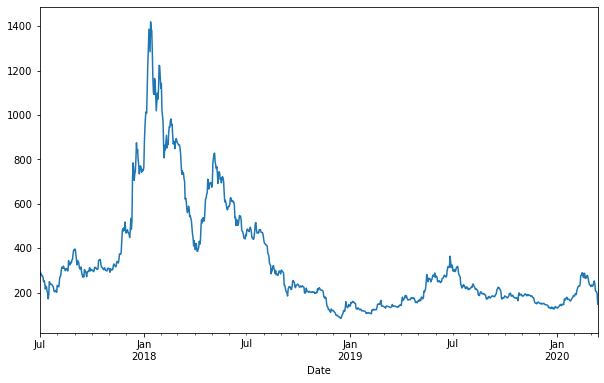

In [38]:
highs.plot(figsize=(10,6))

### 12. Hacer resampling para varias columnas

In [40]:
# Para aplicar resampling a todas las columnas, solo debemos tomar todo el Data Frame, y definir el formato
df.resample("W").mean()

,Open,High,Low,Close,Volume
Date,,,,,
2017-07-02,268.066486,271.124595,264.819730,268.202162,2.185035e+06
2017-07-09,261.337024,262.872917,259.186190,261.062083,1.337349e+06
2017-07-16,196.193214,199.204405,192.722321,195.698393,2.986756e+06
2017-07-23,212.351429,215.779286,209.126310,212.783750,4.298593e+06
2017-07-30,203.496190,205.110357,201.714048,203.309524,1.581729e+06
...,...,...,...,...,...
2020-02-16,255.021667,257.255238,252.679762,255.198452,2.329087e+06
2020-02-23,265.220833,267.263690,262.948512,265.321905,1.826094e+06
2020-03-01,236.720536,238.697500,234.208750,236.373988,2.198762e+06


In [44]:
# Tambien podemos aplicar calculos estadísticos individuales a cada columna con "agg()"
# Se crea un diccionario, donde las keys son las columnas, y los values los estadisticos
df.resample('M').agg({"Close":"mean", "High":"max", "Low":"min"}).head(10)

,Close,High,Low
Date,,,
2017-07-31,220.010969,293.73,130.26
2017-08-31,298.511815,392.00,200.82
2017-09-30,298.524639,396.88,202.25
2017-10-31,305.649772,350.00,275.46
2017-11-30,355.646292,518.13,278.88
2017-12-31,629.898011,875.00,415.01
2018-01-31,1084.040390,1419.96,727.14
2018-02-28,872.098304,1143.00,555.56
2018-03-31,629.704341,878.00,365.00
